# Diego Cordeiro Maceiras, Laura Quintáns López
## Traballo 1

### **Dataset -->** [Car sales data](https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales/data)

Obxectivo: Predicir o prezo dos coches a partires de determinadas variables.

Todo esto nun ficheiro `.zip`
- Nome do traballo: nomeeapelido1_nomeeapelido2.ipynb
- Enviar a base de datos

In [1]:
#-- Imports das librerías --
# Álxebra lineal e manipulación de datos
import numpy as np 
import pandas as pd
# Graficación
import seaborn as sns
import matplotlib.pyplot as plt    
plt.style.use("fast")

# Preprocesamento de datos
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Modelos e métricas
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
#-- Lectura dos datos --
df = pd.read_csv("car_sales_data.csv")
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [3]:
print( "Os parámetros deste dataset son: " ); print( df.columns.to_list() )

Os parámetros deste dataset son: 
['Manufacturer', 'Model', 'Engine size', 'Fuel type', 'Year of manufacture', 'Mileage', 'Price']


In [4]:
# Información xeral do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


### Estudo da Correlación

Imos ver a **Matriz de correlación** das variables para ver cales están máis correlacionadas entre sí.

In [5]:
# Cambiamos os data types das columnas (para poder traballar con eles)
# obj --> int8
df_copy = df.copy()
df_copy["Manufacturer"] = df["Manufacturer"].astype('category').cat.codes
df_copy["Model"] = df["Model"].astype('category').cat.codes
df_copy["Fuel type"] = df["Fuel type"].astype('category').cat.codes

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  int8   
 1   Model                50000 non-null  int8   
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  int8   
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), int8(3)
memory usage: 1.7 MB


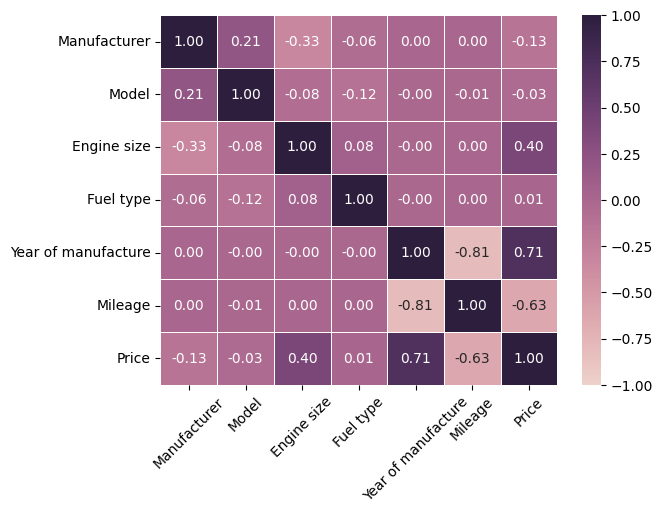

In [6]:

corr_matrix = df_copy.corr() # Matriz de correlación

# Visualización da matriz de correlación
ax = sns.heatmap(corr_matrix, vmax=1, vmin=-1, annot=True, fmt=".2f", linewidth=0.5, cmap= sns.cubehelix_palette(as_cmap=True))
# annot --> para ver os valores na matriz
# fmt --> para controlar o formato dos valores na matriz
# cmap --> para cambiar o mapa de cores
# linewidth --> para o grosor da separación entre celas 
# vmax e vmin --> para controlar o rango de valores nos que se van a mapear ás cores

ax.xaxis.set_tick_params(rotation=45) #rota os nomes das columnas

Vemos que hai dúas variables moi correlacionadas co prezo i entre si:
* **Mileage**
* **Year of manufacture**

1. O motivo da súa relación mútua é evidente: *Canto máis vello o coche, máis probable é que recorrera máis km*.
2. O motivo da súa relación co prezo tamén é evidente: *Canto máis usado o coche, menos interés hai na súa compra*.

## Visualización

Imos graficar os valores de cada variable con respecto ó prezo.

Non podemos facelo todo nunha gráfica, xa que temos 6 variables + 1 variable obxectivo ( o prezo ). Debido a isto debuxaremos 6 gráficas distintas.

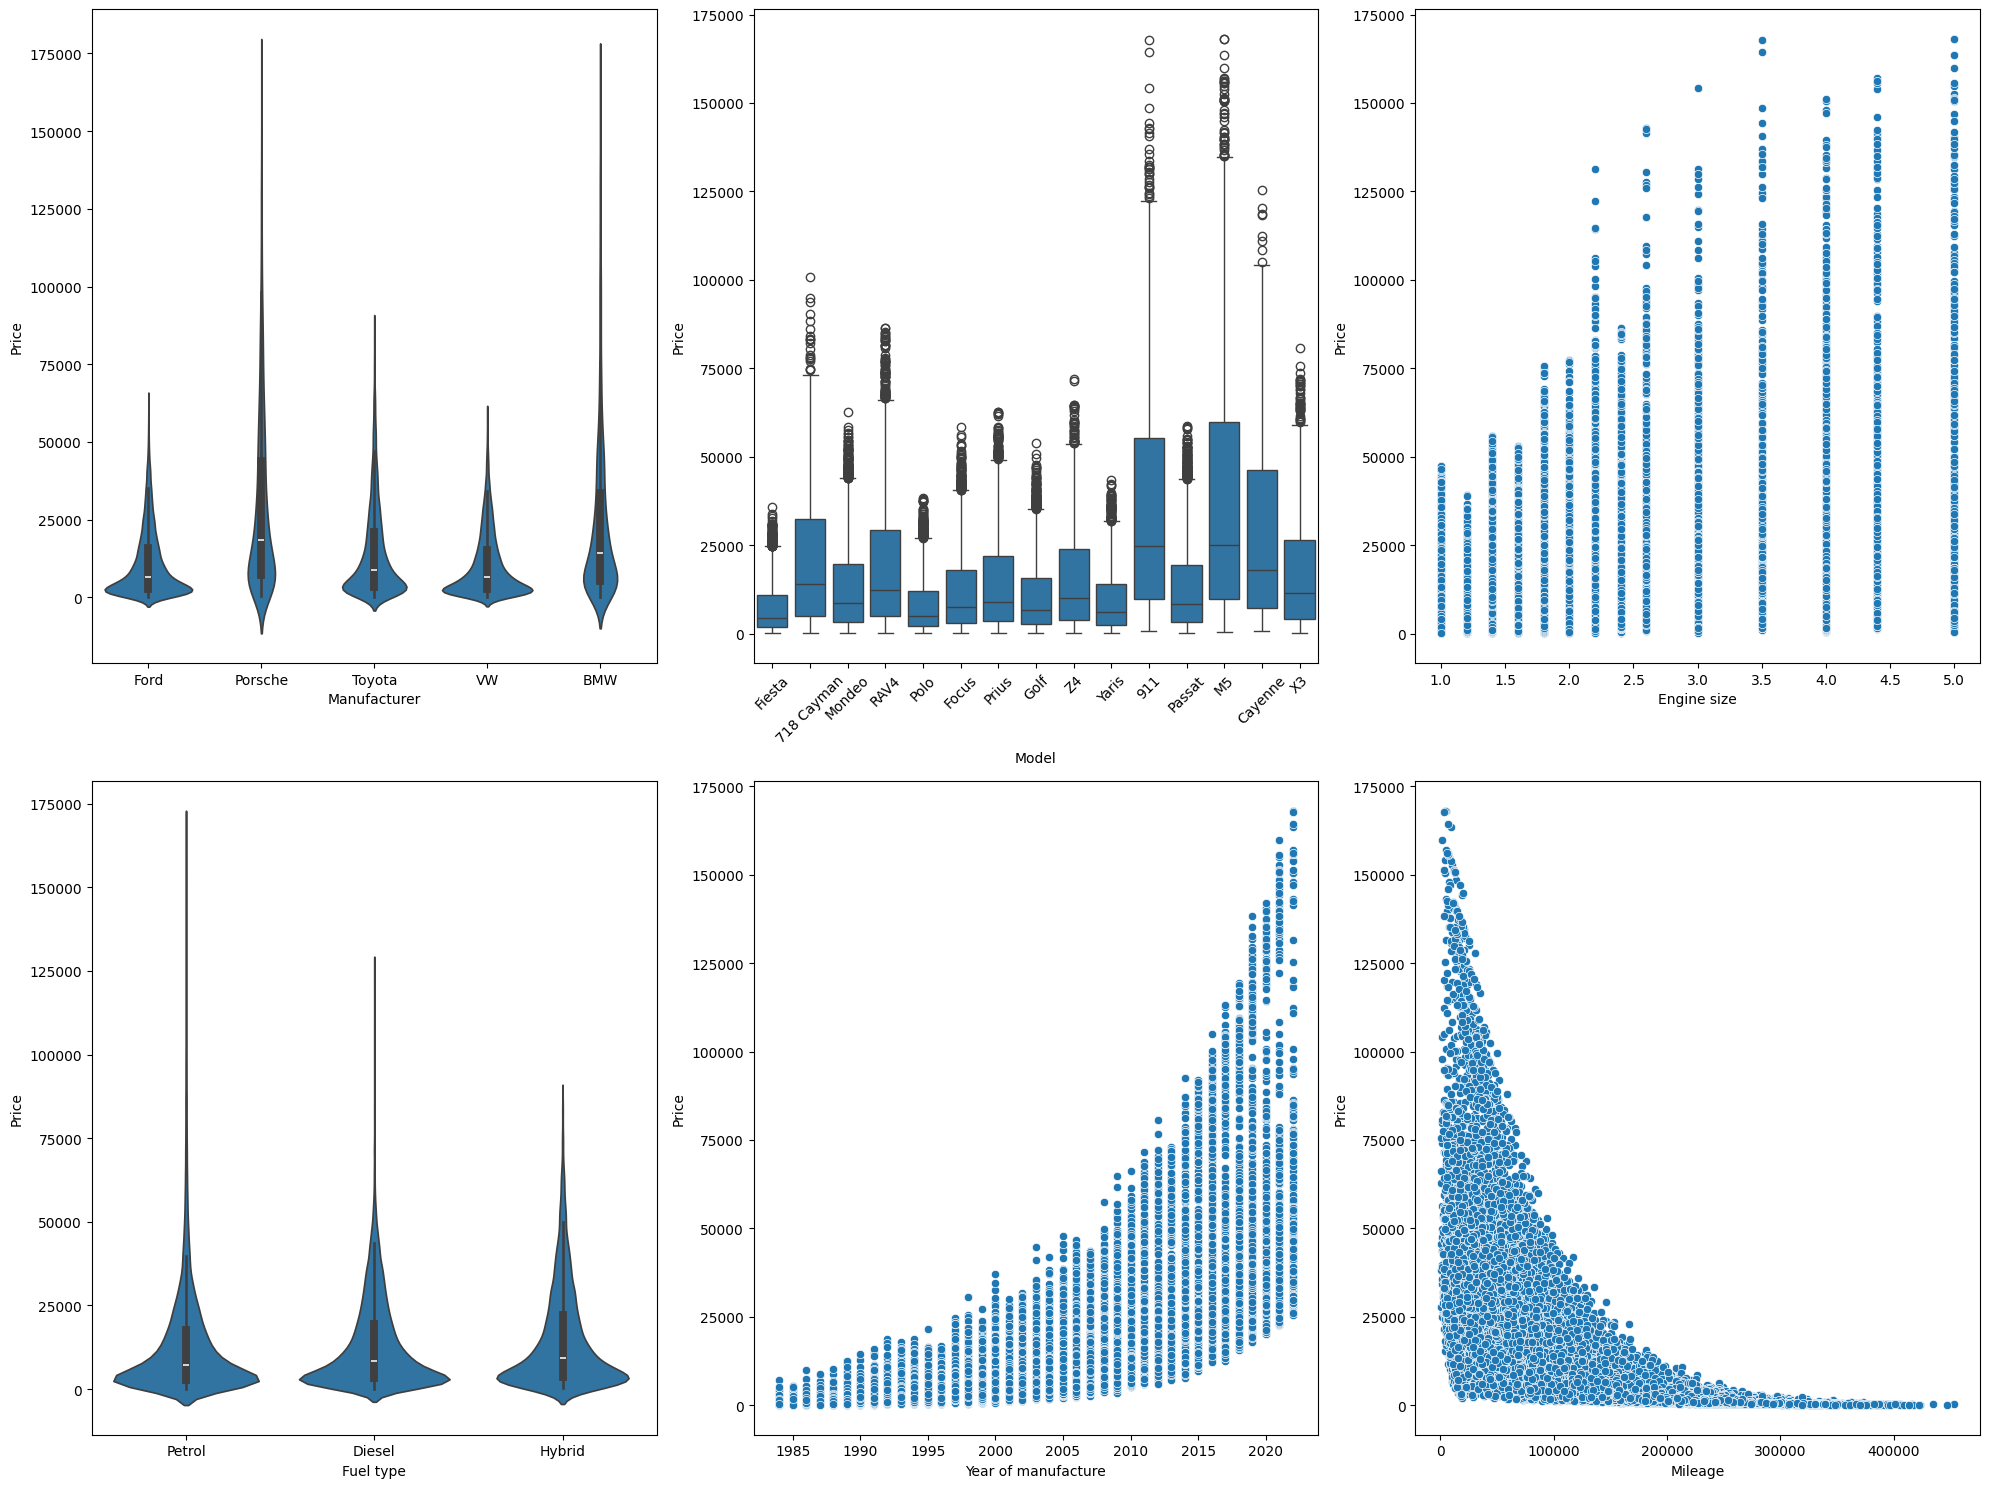

In [7]:
# Ploteo un gráfico de cada variable con respecto ao prezo 
fig, axs = plt.subplots(2, 3, figsize= (20, 15))

sns.violinplot(data=df, x= "Manufacturer", y="Price", ax = axs[0, 0])
sns.boxplot(data=df, x= "Model", y="Price", ax = axs[0, 1])
sns.scatterplot(data=df, x="Engine size", y="Price", ax = axs[0, 2])
sns.violinplot(data=df, x="Fuel type", y="Price", ax = axs[1, 0])
sns.scatterplot(data=df, x="Year of manufacture", y="Price", ax = axs[1, 1])
sns.scatterplot(data=df, x="Mileage", y="Price", ax = axs[1, 2])

axs[0,1].xaxis.set_tick_params(rotation=45)

fig.tight_layout()

## Preparación dos datos

A primeira preparación dos datos farémola paso a paso para ver o que fai cada función.

In [8]:
#Elixo as variables a estudar
vars = ["Manufacturer", "Fuel type", "Model", "Engine size", "Year of manufacture", "Mileage"] # Variables independentes
obj = "Price" # Variable obxectivo

# Cambio o formato dos datos
# DataFrame --> array
print( "Antes do cambio de formato: " ); print( " df -> ", type(df) , df.shape ); print("")  
x = df[vars].values
y = df[obj].values.reshape(-1, 1) # Necesito facer o reshape (ten que ser unha matriz 2D, non un vector)

# -- Varios printeos para facer comprobacións --
print( "Despois do cambio de formato: " ); print( " x --> ",type(x), x.shape,"\n y --> ", type(y) , y.shape)
print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )


Antes do cambio de formato: 
 df ->  <class 'pandas.core.frame.DataFrame'> (50000, 7)

Despois do cambio de formato: 
 x -->  <class 'numpy.ndarray'> (50000, 6) 
 y -->  <class 'numpy.ndarray'> (50000, 1)

Primeira fila de x:  ['Ford' 'Petrol' 'Fiesta' 1.0 2002 127300]
Tipo de datos de x:  [<class 'str'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'int'>, <class 'int'>]


|É necesario transformar os datos de formato *string* a formato numérico|
|-|

O modelo que queremos adestrar non trata con datos categóricos

In [9]:
# Encodificador para a variable "Manufacturer"
le_Manufacturer = preprocessing.LabelEncoder() 
le_Manufacturer.fit( df["Manufacturer"].unique() ) # .unique() --> devolve unha lista con todos os posibles valores da variable (úsase nun pandas.Series)
x[:,0] = le_Manufacturer.transform( x[:,0] ) # .transform() --> transforma os valores da variable segundo o encodificador axustado con .fit()

# Encodificador para a variable "Fuel type"
le_FuelType = preprocessing.LabelEncoder() 
le_FuelType.fit( df["Fuel type"].unique() )
x[:,1] = le_FuelType.transform( x[:,1] )

le_Model = preprocessing.LabelEncoder() 
le_Model .fit( df["Model"].unique() )
x[:,2] = le_Model .transform( x[:,2] )

print("\nPrimeira fila de x: ", x[0]) ; print("Tipo de datos de x: ", [type(x[0,i]) for i in range(x.shape[1])] )



Primeira fila de x:  [1 2 3 1.0 2002 127300]
Tipo de datos de x:  [<class 'int'>, <class 'int'>, <class 'int'>, <class 'float'>, <class 'int'>, <class 'int'>]



É necesario usar a class `MinMaxScaler` para normalizar os datos.

*O adestramento é máis fiable con datos normalizados*.

In [10]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

In [11]:
# Divido os datos en datos de adestramento e datos de testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200 )

# -- Varios printeos para facer comprobacións --
print( x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(40000, 6) (10000, 6) (40000, 1) (10000, 1)


Esta sería a preparación completa paso a paso dos datos para o adestramento do modelo.
___

## Preparación e adestramento do modelo

## Testeo do modelo
Predí ben os prezos?

In [12]:

# -- Xeramos os obxetos onde almacenaremos os modelos e as análises --

# DataFrame para almacenar os R²
r2 = pd.DataFrame({
    "Max Depth": np.arange(5,30,1),
    "R² train": None,
    "R² test": None,
})
# Diccionario para almacenar os modelos
models = {}
for depth in r2["Max Depth"]:
    models[depth] = DecisionTreeRegressor(max_depth=depth)

# -- Bucle, iteración de depths --
for depth, model in models.items():

    # Facemos unha copia dos datos para non modificar os orixinais
    x_train_copy = x_train.copy()
    x_test_copy = x_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()

    # Adestramos o modelo cos datos de adestramento
    model.fit( x_train_copy, y_train_copy )
    y_test_pred = model.predict(x_test_copy)
    y_train_pred = model.predict(x_train_copy)

    # Invertimos a normalización
    y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
    y_test_copy = y_scaler.inverse_transform(y_test_copy)
    y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))
    y_train_copy = y_scaler.inverse_transform(y_train_copy)

    # Calculamos o R² e gardámolo no DataFrame
    r2.loc[r2["Max Depth"]==depth, "R² test"] = r2_score( y_test_copy, y_test_pred )
    r2.loc[r2["Max Depth"]==depth, "R² train"] = r2_score( y_train_copy, y_train_pred )

# Poñemos a columna "Max Depth" como índice do DataFrame
r2.set_index("Max Depth", inplace=True)

Facemos tamén un estudo **quitando unha das variables altamente correlacionadas** co prezo, por exemplo: `Year of manufacture`

In [13]:
# -- FACEMOS O MESMO CÁLCULO DE R² QUITÁNDOLLE UNHA VARIABLE ALTAMENTE CORRELACIONADA --

#Elixo as variables a estudar
vars_yom = ["Manufacturer", "Fuel type", "Model", "Engine size","Mileage"] # Variables independentes
obj = "Price" # Variable obxectivo

# Cambio o formato dos datos
# DataFrame --> array
x = df[vars_yom].values
y = df[obj].values.reshape(-1, 1) # Necesito facer o reshape (ten que ser unha matriz 2D, non un vector)

# -- Cambio de formato das variables categóricas --
x[:,0] = le_Manufacturer.transform( x[:,0] )
x[:,1] = le_FuelType.transform( x[:,1] )
x[:,2] = le_Model .transform( x[:,2] )

# Normalizo os datos
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

# Divido os datos en datos de adestramento e datos de testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200 )

# -- Xeramos os obxetos onde almacenaremos os modelos e as análises --

# DataFrame para almacenar os R²
r2_prime = pd.DataFrame({
    "Max Depth": np.arange(5,20,1),
    "R² train": None,
    "R² test": None,
})
# Diccionario para almacenar os modelos
models_prime = {}
for depth in r2_prime["Max Depth"]:
    models_prime[depth] = DecisionTreeRegressor(max_depth=depth)

# -- Bucle, iteración de depths --
for depth, model in models_prime.items():

    # Facemos unha copia dos datos para non modificar os orixinais
    x_train_copy = x_train.copy()
    x_test_copy = x_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()

    # Adestramos o modelo cos datos de adestramento
    model.fit( x_train_copy, y_train_copy )
    y_test_pred = model.predict(x_test_copy)
    y_train_pred = model.predict(x_train_copy)

    # Invertimos a normalización
    y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
    y_test_copy = y_scaler.inverse_transform(y_test_copy)
    y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))
    y_train_copy = y_scaler.inverse_transform(y_train_copy)

    # Calculamos o R² e gardámolo no DataFrame
    r2_prime.loc[r2_prime["Max Depth"]==depth, "R² test"] = r2_score( y_test_copy, y_test_pred )
    r2_prime.loc[r2_prime["Max Depth"]==depth, "R² train"] = r2_score( y_train_copy, y_train_pred )

# Poñemos a columna "Max Depth" como índice do DataFrame
r2_prime.set_index("Max Depth", inplace=True)

In [14]:
# -- FACEMOS O MESMO CÁLCULO DE R² QUITÁNDOLLE MODEL --

#Elixo as variables a estudar
vars_model = ["Manufacturer", "Fuel type", "Engine size","Mileage", "Year of manufacture"] # Variables independentes
obj = "Price" # Variable obxectivo

# Cambio o formato dos datos
# DataFrame --> array
x = df[vars_model].values
y = df[obj].values.reshape(-1, 1) # Necesito facer o reshape (ten que ser unha matriz 2D, non un vector)

# -- Cambio de formato das variables categóricas --
x[:,0] = le_Manufacturer.transform( x[:,0] )
x[:,1] = le_FuelType.transform( x[:,1] )

# Normalizo os datos
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

# Divido os datos en datos de adestramento e datos de testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200 )

# -- Xeramos os obxetos onde almacenaremos os modelos e as análises --

# DataFrame para almacenar os R²
r2_prime2 = pd.DataFrame({
    "Max Depth": np.arange(5,20,1),
    "R² train": None,
    "R² test": None,
})
# Diccionario para almacenar os modelos
models_prime2 = {}
for depth in r2_prime2["Max Depth"]:
    models_prime2[depth] = DecisionTreeRegressor(max_depth=depth)

# -- Bucle, iteración de depths --
for depth, model in models_prime2.items():

    # Facemos unha copia dos datos para non modificar os orixinais
    x_train_copy = x_train.copy()
    x_test_copy = x_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()

    # Adestramos o modelo cos datos de adestramento
    model.fit( x_train_copy, y_train_copy )
    y_test_pred = model.predict(x_test_copy)
    y_train_pred = model.predict(x_train_copy)

    # Invertimos a normalización
    y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1,1))
    y_test_copy = y_scaler.inverse_transform(y_test_copy)
    y_train_pred = y_scaler.inverse_transform(y_train_pred.reshape(-1,1))
    y_train_copy = y_scaler.inverse_transform(y_train_copy)

    # Calculamos o R² e gardámolo no DataFrame
    r2_prime2.loc[r2_prime2["Max Depth"]==depth, "R² test"] = r2_score( y_test_copy, y_test_pred )
    r2_prime2.loc[r2_prime2["Max Depth"]==depth, "R² train"] = r2_score( y_train_copy, y_train_pred )

# Poñemos a columna "Max Depth" como índice do DataFrame
r2_prime2.set_index("Max Depth", inplace=True)

### Por que usamos unha «*depth*» distinta para os diferentes modelos?

Porque o que nos importa é a *depth* á que o **R² test** é maior, xa que o *«R² train»* vai mellorar sempre, pero non queremos que se sobreadestre o modelo con datos de adestramento.

In [15]:
# -- Prints dos resultados --

# Con todas as variables
print("--"*60)
print("Coas variables: ", vars, end="\n"*2)
print(r2)
print("--"*60)

# Sen "Year of manufacture"
print("--"*60)
print("Coas variables: ", vars_yom, end="\n"*2)
print(r2_prime)
print("--"*60)

# Sen "Model"
print("--"*60)
print("Coas variables: ", vars_yom, end="\n"*2)
print(r2_prime2)
print("--"*60)


------------------------------------------------------------------------------------------------------------------------
Coas variables:  ['Manufacturer', 'Fuel type', 'Model', 'Engine size', 'Year of manufacture', 'Mileage']

           R² train   R² test
Max Depth                    
5           0.90512  0.902072
6          0.934419  0.932286
7          0.955142  0.954931
8          0.971498  0.969166
9          0.981603  0.978286
10         0.988133  0.984452
11         0.992527  0.989157
12         0.995368   0.99223
13         0.997263  0.993702
14         0.998476  0.994796
15         0.999209  0.995798
16         0.999607  0.996151
17          0.99983  0.996314
18         0.999936  0.996291
19         0.999979  0.996379
20         0.999994  0.996073
21         0.999999  0.995369
22              1.0  0.996288
23              1.0  0.996274
24              1.0  0.996302
25              1.0  0.996336
26              1.0  0.996353
27              1.0  0.996342
28              1.0  0.

## Graficación dos resultados

Graficamos os resultados de **«R² train»**, **«R² test»** e marcaremos a **«depth»** na que o «R² test» é máximo para cada modelo. 

In [16]:
# -- FUNCIÓN DE PLOTEO DOS R² --

def plot_r2(r2, title="Usando todas as variables" ,ax=None):
    """Grafica os R² de adestramento e testeo en función do max_depth do DecisionTreeRegressor.
    
    Parameters:
        r2 : pandas.DataFrame
            DataFrame coas columnas "R² train" e "R² test" indexadas por "Max Depth".
        title : str, optional
            Título do gráfico. Por defecto é "Usando todas as variables".
        ax : matplotlib.axes.Axes, optional
            Eixo onde se graficará. Se é None, créase un novo.
    Returns:
        None
    """

    # Plots dos datos de R² e liñas marcando o máximo
    ax.plot(r2.index.values, r2["R² train"], marker='s',linestyle="-", label="R² train") # R² de adestramento
    ax.plot(r2.index.values, r2["R² test"], marker='s', label="R² test") # R² de testeo
    ax.axhline(y = max(r2["R² test"].values), color="C3", linestyle="-.",  label="Max R² test") # Liña horizontal
    ax.axvline(x = r2["R² test"].idxmax(), color="C3", linestyle="-.") # Liña vertical

    # Modificacións dos eixos
    ax.set_xlabel("Depth"); ax.set_ylabel("R²")
    ax.set_title("{}".format(title))
    ax.set_xlim(r2.index.values[0]-.5, r2.index.values[-1]+.5)
    ax.set_ylim(min(r2["R² test"])*0.995,max(r2["R² train"])*1.005)

    # Modificacións dos ticks
    ax.minorticks_on()
    ax.tick_params(axis="x", which="minor",length=0, labelbottom=False)
    ax.tick_params(axis="y", which="minor",length=4, direction="inout")
    ax.tick_params(axis="both", which="major",length=7, direction="inout")
    ax.set_xticks(r2.index.values); ax.set_yticks(np.arange( np.trunc( min(r2["R² test"])*0.995*100)/100 , 1.01, 0.01 ))
    ax.tick_params(axis="x", labelrotation=90)


    # Configuración das cuadrículas
    ax.grid(axis="both", which="major", linestyle='-', linewidth='0.5', color='black', alpha=0.4) # Grid para major ticks
    ax.grid(axis="y", which="minor", linestyle=':', linewidth='0.5', color='black', alpha=0.4) # Grid para minor ticks

    # Lenda
    ax.legend(loc="best", framealpha=1)

    return None

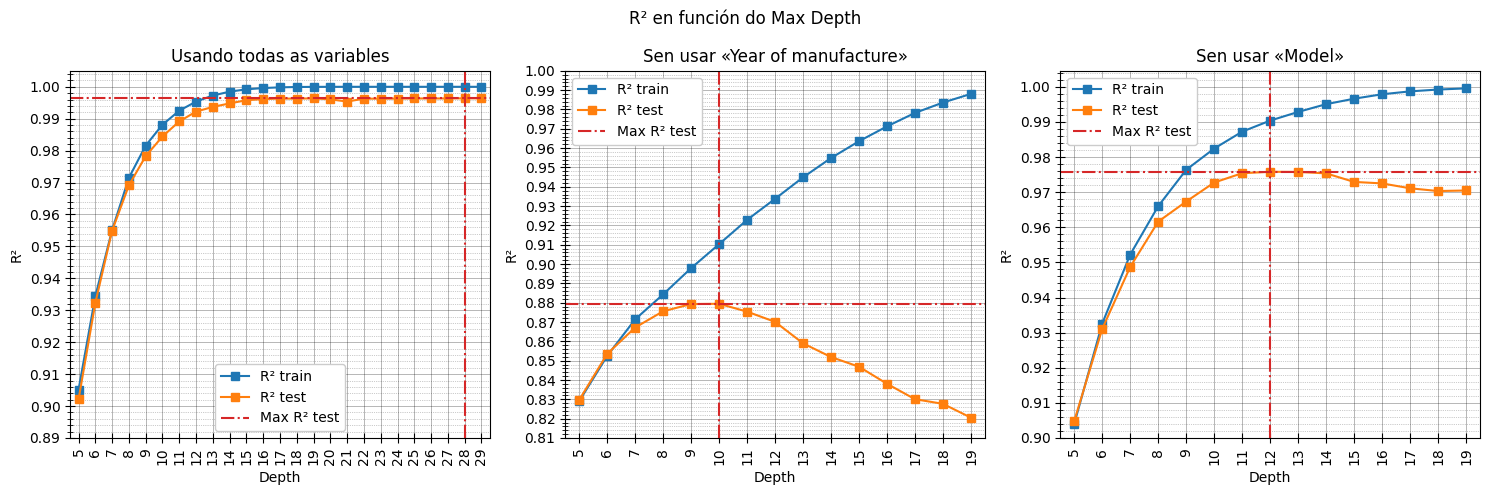

In [ ]:
# -- Gráficas --
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

fig.suptitle("R² en función do Max Depth")
plot_r2(r2, ax=ax[0])
plot_r2(r2_prime, title="Sen usar «Year of manufacture»", ax=ax[1])
plot_r2(r2_prime2, title="Sen usar «Model»", ax=ax[2])
fig.tight_layout()

## Conclusións 

Podemos concluír con estes resultados que, o *«DecissionTree»* ... 

* ... da peores resultados se eliminamos variables. Canto máis correlacionadas estén esas variables coa variable obxectivo peor da.
* ... danos o máximo $R²_{test}$ para maior *«depth»* do árbol canto máis variables teñamos. 